In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/EWD3QN'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EWD3QN


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

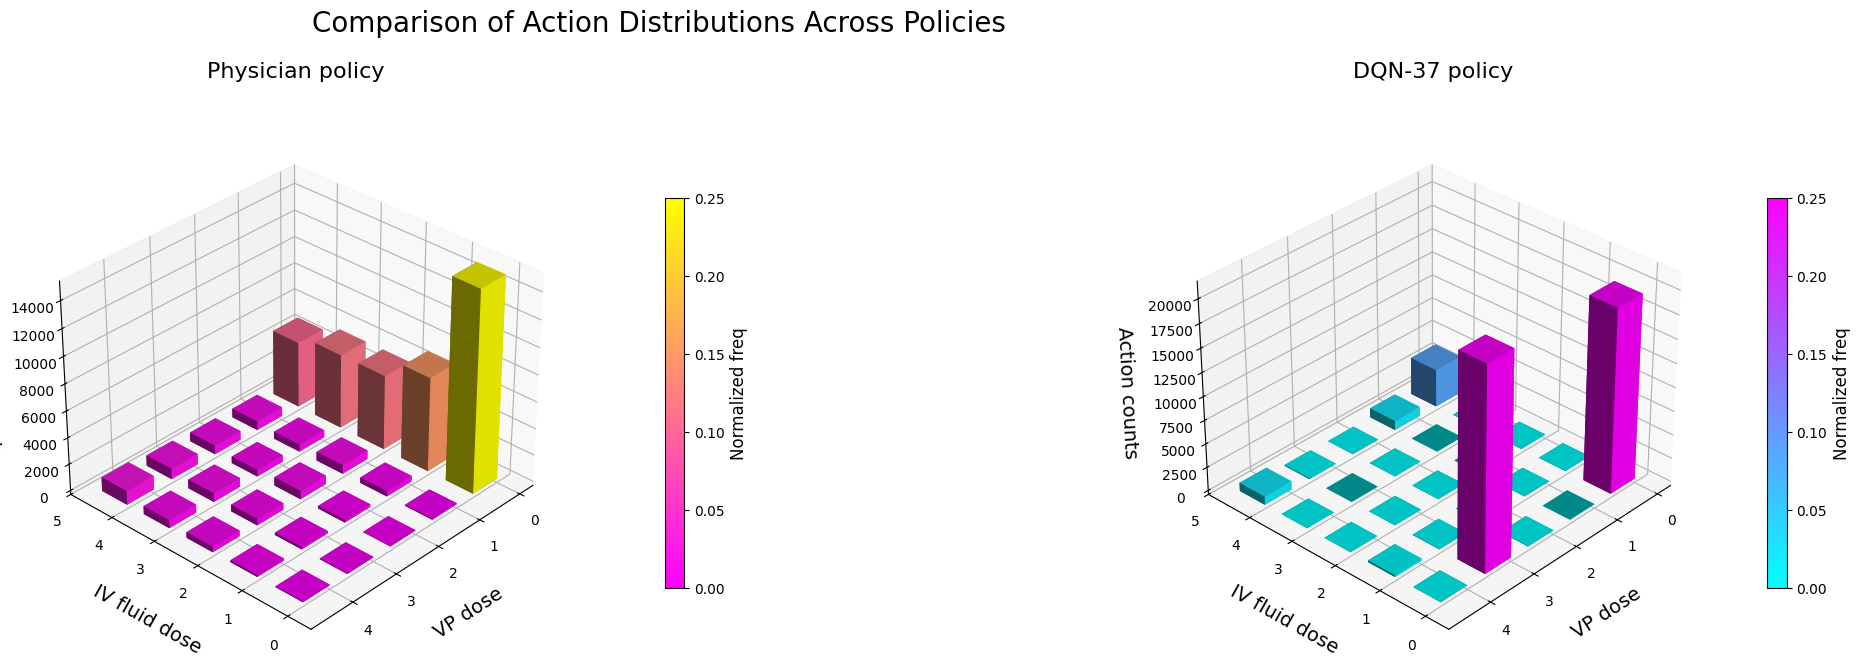

In [15]:
def build_subplot(ax, data, inv_action_map, title, cmap_name, fig):
    # Konversi indeks ke pasangan (iv, vaso)
    actions_tuple = np.array([inv_action_map[a] for a in data])
    iv = actions_tuple[:, 0]
    vaso = actions_tuple[:, 1]

    # Histogram 2D untuk visualisasi distribusi tindakan
    hist, _, _ = np.histogram2d(iv, vaso, bins=5, range=[[0, 5], [0, 5]])

    z_sum = np.sum(hist)
    width = depth = 0.6
    height = np.zeros_like(hist)

    for i in range(5):
        for j in range(5):
            z = hist[i][j]
            norm = plt.Normalize(0, 0.25)
            norm_val = norm(z / z_sum if z_sum > 0 else 0)
            # cmap = cm.get_cmap(name=cmap_name)
            cmap = matplotlib.colormaps[cmap_name]
            color = cmap(norm_val)
            ax.bar3d(j, i, 0, width, depth, z, color=color)

    # Label sumbu dan title
    ax.set_xlabel('VP dose', fontsize=14, labelpad=12)
    ax.set_ylabel('IV fluid dose', fontsize=14, labelpad=12)
    ax.set_zlabel('Action counts', fontsize=14, labelpad=10)
    ax.set_title(title, fontsize=16, pad=40)
    ax.set_ylim(5, -0.5)
    ax.view_init(32, 43)

    # Colorbar terhubung ke subplot ini
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax, shrink=0.75, pad=0.1)
    cb.ax.tick_params(labelsize=10)
    cb.set_label('Normalized freq', fontsize=12)

# === Load Data ===
phys_actions = np.load('EWD3QN/phys_actionsb.npy', allow_pickle=True)
IDDE_actions = np.load('EWD3QN/agent_actionsb.npy', allow_pickle=True)

# === Mapping indeks ke aksi diskret (0–4, 0–4) ===
inv_action_map = {i: [i // 5, i % 5] for i in range(25)}

# === Create Figure ===
fig = plt.figure(figsize=(24, 6), facecolor='w', constrained_layout=True)
fig.suptitle("Comparison of Action Distributions Across Policies", fontsize=20, y=1.08)

# === Plot: Physician ===
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
build_subplot(ax1, phys_actions, inv_action_map, "Physician policy", "spring", fig)

# === Plot: ID3QNE ===
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
build_subplot(ax3, IDDE_actions, inv_action_map, "DQN-37 policy", "cool", fig)

# === Show or Save ===
# plt.savefig("policy_comparison_3D.png", dpi=300, bbox_inches='tight')
plt.show()
